In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
import seaborn as sb
sb.set(style="white")
sb.set(style="whitegrid", color_codes=True)

### Importing Dataset

We choose subset here which contains 5 diff emojis

In [ ]:
v2_fname = "full_{}_preprocessed_v2.csv"
base_fname = "full_{}_preprocessed.csv"
embedding_fname = "full_{}_preprocessed_with_word.csv"
subset = "full_{}_preprocessed_subset.csv"
expanded = "full_{}_preprocessed_expanded.csv"

In [ ]:
file_chosen = subset

In [ ]:
train_df = pd.read_csv(file_chosen.format("train"))
train_df = train_df.drop(columns=['Unnamed: 0'])
train_df.head()

/var/folders/xz/z0kw7g5n10s5qncvzws5gxhr0000gn/T/ipykernel_79875/1793640532.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(file_chosen.format("train"))


,annotations,text,hashtag,tokens,upper_case,num_digits,num_hashtags,num_words,average_word_length,positive,neutral,negative,compound,label
0,1384,Nobody go to Walmart in sulphur,NaN,"['nobody', 'go', 'walmart', 'sulphur']",2,0,1,6,4.333333,0.0,1.0,0.0,0.0,2
1,1384,@emberlhamon @MLidak welcome to the ugly club!!,NaN,"['welcome', 'ugly', 'club']",2,0,1,8,5.125000,0.0,1.0,0.0,0.0,2
2,1384,getting to help coach jr high,NaN,"['getting', 'help', 'coach', 'jr', 'high']",0,0,1,6,4.000000,0.0,1.0,0.0,0.0,2
3,1384,Yo Gotti and Black Youngsta on stage we all th...,NaN,"['yo', 'gotti', 'black', 'youngsta', 'stage', ...",4,0,1,13,3.692308,0.0,1.0,0.0,0.0,2
4,1384,@spenceribarra just making sure I haven't been...,NaN,"['making', 'sure', 'havent', 'replaced']",1,0,1,9,5.333333,0.0,1.0,0.0,0.0,2


In [ ]:
train_df.groupby("label").count()

,annotations,text,hashtag,tokens,upper_case,num_digits,num_hashtags,num_words,average_word_length,positive,neutral,negative,compound
label,,,,,,,,,,,,,
0,31384,31384,6240,31383,31384,31384,31384,31384,31384,31384,31384,31384,31384
1,27748,27748,1867,27748,27748,27748,27748,27748,27748,27748,27748,27748,27748
2,23281,23281,1889,23276,23281,23281,23281,23281,23281,23281,23281,23281,23281
3,27744,27744,4557,27741,27744,27744,27744,27744,27744,27744,27744,27744,27744
4,23842,23842,1248,23842,23842,23842,23842,23842,23842,23842,23842,23842,23842


In [ ]:
train_df.groupby("annotations").count()

,text,hashtag,tokens,upper_case,num_digits,num_hashtags,num_words,average_word_length,positive,neutral,negative,compound,label
annotations,,,,,,,,,,,,,
186,31384,6240,31383,31384,31384,31384,31384,31384,31384,31384,31384,31384,31384
1381,27748,1867,27748,27748,27748,27748,27748,27748,27748,27748,27748,27748,27748
1384,23281,1889,23276,23281,23281,23281,23281,23281,23281,23281,23281,23281,23281
1392,27744,4557,27741,27744,27744,27744,27744,27744,27744,27744,27744,27744,27744
1447,23842,1248,23842,23842,23842,23842,23842,23842,23842,23842,23842,23842,23842


Text(0.5, 0, 'Emoji Label')

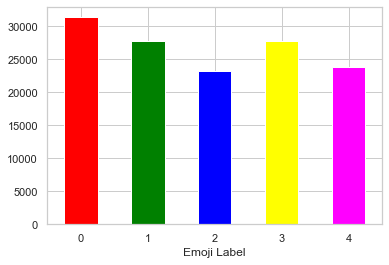

In [ ]:
ax = train_df['label'].value_counts().sort_index().plot(kind='bar', rot=0, color=['red', 'green', 'blue', 'yellow', 'magenta'])
ax.set_xlabel("Emoji Label")

In [ ]:
val_df = pd.read_csv(file_chosen.format("val"))
val_df = val_df.drop(columns=['Unnamed: 0'])
val_df.head()

,annotations,text,hashtag,tokens,upper_case,num_digits,num_hashtags,num_words,average_word_length,positive,neutral,negative,compound,label
0,1447,Day 24- really struggling today with Diwali an...,NaN,"['day', '24', 'really', 'struggling', 'today',...",3,2,1,14,4.785714,0.0,1.0,0.0,0.0,4
1,1447,@Davefrom1987 @WHURealOpinions @WestHam_Centra...,NaN,"['actually', 'see', 'southampton', 'game']",11,4,1,11,7.363636,0.0,1.0,0.0,0.0,4
2,1447,@shreyasms Srilanka let's help their economy,NaN,"['srilanka', 'let', 'help', 'economy']",1,0,1,7,5.571429,0.0,1.0,0.0,0.0,4
3,1447,hurry up i got things to do @catmeow5555,NaN,"['hurry', 'got', 'thing']",0,4,1,9,3.666667,0.0,1.0,0.0,0.0,4
4,1447,@ruprekt79 @CroneInAMillion @jameelajamil That...,NaN,"['thats', 'shes', 'still', 'tweeting', 'franci...",7,2,1,11,7.454545,0.0,1.0,0.0,0.0,4


In [ ]:
val_df.groupby("label").count()

,annotations,text,hashtag,tokens,upper_case,num_digits,num_hashtags,num_words,average_word_length,positive,neutral,negative,compound
label,,,,,,,,,,,,,
0,4137,4137,838,4137,4137,4137,4137,4137,4137,4137,4137,4137,4137
1,3493,3493,240,3493,3493,3493,3493,3493,3493,3493,3493,3493,3493
2,2919,2919,240,2919,2919,2919,2919,2919,2919,2919,2919,2919,2919
3,3671,3671,646,3670,3671,3671,3671,3671,3671,3671,3671,3671,3671
4,3003,3003,180,3003,3003,3003,3003,3003,3003,3003,3003,3003,3003


Text(0.5, 0, 'Emoji Label')

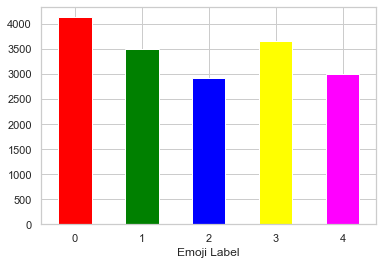

In [ ]:
ax = val_df['label'].value_counts().sort_index().plot(kind='bar', rot=0, color=['red', 'green', 'blue', 'yellow', 'magenta'])
ax.set_xlabel("Emoji Label")

In [ ]:
test_df = pd.read_csv(file_chosen.format("test"))
test_df = test_df.drop(columns=['Unnamed: 0'])
test_df.head()

,annotations,text,hashtag,tokens,upper_case,num_digits,num_hashtags,num_words,average_word_length,positive,neutral,negative,compound,label
0,1447,I don't know why but whenever i tried to take ...,selfie Seductive Camera NewProfilePic,"['dont', 'know', 'whenever', 'tried', 'take', ...",2,0,4,15,3.866667,0.0,1.0,0.0,0.0,4
1,1447,@MZN___ Iont even want the number no more,NaN,"['iont', 'even', 'want', 'number']",4,0,1,9,3.777778,0.0,1.0,0.0,0.0,4
2,1447,@ButterBibi Tah! You can't do anything,NaN,"['tah', 'cant', 'anything']",4,0,1,7,4.714286,0.0,1.0,0.0,0.0,4
3,1447,@TitPostLeft Even the dog's doing an eyeroll,NaN,"['even', 'dog', 'eyeroll']",4,0,1,8,4.750000,0.0,1.0,0.0,0.0,4
4,1447,@mohammed_hijab Wallah I hope that this simpin...,NaN,"['wallah', 'hope', 'simping', 'kuffar', 'minds...",6,0,1,49,4.489796,0.0,1.0,0.0,0.0,4


In [ ]:
test_df.groupby("label").count()

,annotations,text,hashtag,tokens,upper_case,num_digits,num_hashtags,num_words,average_word_length,positive,neutral,negative,compound
label,,,,,,,,,,,,,
0,3934,3934,816,3934,3934,3934,3934,3934,3934,3934,3934,3934,3934
1,3546,3546,244,3545,3546,3546,3546,3546,3546,3546,3546,3546,3546
2,2911,2911,244,2911,2911,2911,2911,2911,2911,2911,2911,2911,2911
3,3619,3619,598,3618,3619,3619,3619,3619,3619,3619,3619,3619,3619
4,3053,3053,169,3053,3053,3053,3053,3053,3053,3053,3053,3053,3053


Text(0.5, 0, 'Emoji Label')

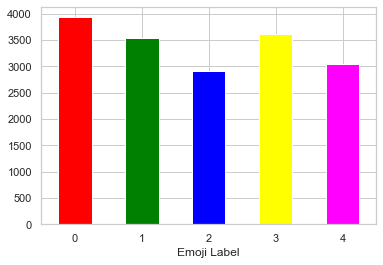

In [ ]:
ax = test_df['label'].value_counts().sort_index().plot(kind='bar', rot=0, color=['red', 'green', 'blue', 'yellow', 'magenta'])
ax.set_xlabel("Emoji Label")

In [ ]:
train_df.groupby("label").mean()

,annotations,upper_case,num_digits,num_hashtags,num_words,average_word_length,positive,neutral,negative,compound
label,,,,,,,,,,
0,186.0,3.291996,0.421871,1.130003,7.816690,4.983562,0.035636,0.960100,0.004264,0.051300
1,1381.0,2.900497,0.447131,1.026705,8.571176,4.667821,0.006569,0.989905,0.003526,0.005769
2,1384.0,2.765560,0.510244,1.039990,9.437524,4.650368,0.007593,0.988195,0.004212,0.006379
3,1392.0,3.074322,0.329837,1.123883,6.419406,4.830935,0.023769,0.973431,0.002800,0.033562
4,1447.0,3.028395,0.511492,1.013925,9.585186,4.734694,0.004201,0.991629,0.004170,-0.000103


In [ ]:
train_df.groupby("label").count()

,annotations,text,hashtag,tokens,upper_case,num_digits,num_hashtags,num_words,average_word_length,positive,neutral,negative,compound
label,,,,,,,,,,,,,
0,31384,31384,6240,31383,31384,31384,31384,31384,31384,31384,31384,31384,31384
1,27748,27748,1867,27748,27748,27748,27748,27748,27748,27748,27748,27748,27748
2,23281,23281,1889,23276,23281,23281,23281,23281,23281,23281,23281,23281,23281
3,27744,27744,4557,27741,27744,27744,27744,27744,27744,27744,27744,27744,27744
4,23842,23842,1248,23842,23842,23842,23842,23842,23842,23842,23842,23842,23842


In [ ]:
## append train with validation

combined = train_df.append(val_df)
combined.groupby("label").count()

/var/folders/xz/z0kw7g5n10s5qncvzws5gxhr0000gn/T/ipykernel_79875/3850660373.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined = train_df.append(val_df)


,annotations,text,hashtag,tokens,upper_case,num_digits,num_hashtags,num_words,average_word_length,positive,neutral,negative,compound
label,,,,,,,,,,,,,
0,35521,35521,7078,35520,35521,35521,35521,35521,35521,35521,35521,35521,35521
1,31241,31241,2107,31241,31241,31241,31241,31241,31241,31241,31241,31241,31241
2,26200,26200,2129,26195,26200,26200,26200,26200,26200,26200,26200,26200,26200
3,31415,31415,5203,31411,31415,31415,31415,31415,31415,31415,31415,31415,31415
4,26845,26845,1428,26845,26845,26845,26845,26845,26845,26845,26845,26845,26845


In [ ]:
combined[['tokens']] = combined.loc[:,['tokens']].fillna(value={})

### Without Word Embeddings (only features)

In [ ]:
X_train, y_train = train_df.drop(['annotations', 'label', 'tokens', 'hashtag', 'text'], axis=1), train_df["label"]
X_test, y_test = test_df.drop(['annotations', 'label',  'tokens', 'hashtag', 'text'], axis=1), test_df["label"]

In [ ]:
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
logreg.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.2625564086034109


<AxesSubplot: >

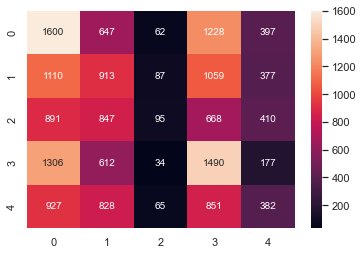

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
sb.heatmap(confusion_matrix, annot=True, fmt='g')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.27      0.41      0.33      3934
           1       0.24      0.26      0.25      3546
           2       0.28      0.03      0.06      2911
           3       0.28      0.41      0.33      3619
           4       0.22      0.13      0.16      3053

    accuracy                           0.26     17063
   macro avg       0.26      0.25      0.23     17063
weighted avg       0.26      0.26      0.24     17063



In [ ]:
from sklearn.metrics import roc_auc_score
logit_roc_auc_ovo = roc_auc_score(y_test, logreg.predict_proba(X_test), multi_class="ovo")
macro_logit_roc_auc_ovr = roc_auc_score(y_test, logreg.predict_proba(X_test), average="macro", multi_class="ovr")

print("ROC-AUC (OVO)", logit_roc_auc_ovo)
print("ROC-AUC (OVR)", macro_logit_roc_auc_ovr)

ROC-AUC (OVO) 0.5803172138162198
ROC-AUC (OVR) 0.5820703689108144


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score

micro_prec, micro_rec, _, _ = precision_recall_fscore_support(y_test, y_pred, average="micro")
micro_f1_score = f1_score(y_test, y_pred, average="micro")
macro_prec, macro_rec, _, _ = precision_recall_fscore_support(y_test, y_pred, average="macro")
macro_f1_score = f1_score(y_test, y_pred, average="macro")

In [ ]:
print("Accuracy:", logreg.score(X_test, y_test))
print("ROC-AUC (OVR) score:", macro_logit_roc_auc_ovr)
print("Precision (Micro)", micro_prec)
print("Recall (Micro)", micro_rec)
print("F1-score (Micro)", micro_f1_score)
print("Precision (Macro)", macro_prec)
print("Recall (Macro)", macro_rec)
print("F1-score (Macro)", macro_f1_score)

Accuracy: 0.2625564086034109
ROC-AUC (OVR) score: 0.5820703689108144
Precision (Micro) 0.2625564086034109
Recall (Micro) 0.2625564086034109
F1-score (Micro) 0.2625564086034109
Precision (Macro) 0.25781137269233323
Recall (Macro) 0.24673150865399673
F1-score (Macro) 0.2253095803682783


In [ ]:
import pickle
filename = "logreg_no_embeds.sav"
pickle.dump(logreg, open(filename, "wb"))

### TFIDF

In [ ]:
## TFIDF

x_train = combined['tokens'].astype(str)
y_train = combined['label']

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
count_vect = CountVectorizer(stop_words='english')
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)
x_train_counts = count_vect.fit_transform(x_train)
x_train_tfidf = transformer.fit_transform(x_train_counts)
print(x_train_tfidf.shape)
print(x_train_counts.shape)
print(y_train.shape)

(151222, 43041)
(151222, 43041)
(151222,)


In [ ]:
x_test = test_df["tokens"].astype(str)
y_test = test_df["label"]
x_test_counts = count_vect.transform(x_test)
x_test_tfidf = transformer.transform(x_test_counts)
print(x_test_counts.shape)
print(x_test_tfidf.shape)

(17063, 43041)
(17063, 43041)


In [ ]:
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
logreg.fit(x_train_tfidf, y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [ ]:
y_pred = logreg.predict(x_test_tfidf)
print('Accuracy of logistic regression classifier on test set: {}'.format(logreg.score(x_test_tfidf, y_test)))

Accuracy of logistic regression classifier on test set: 0.41229561038504364


<AxesSubplot: >

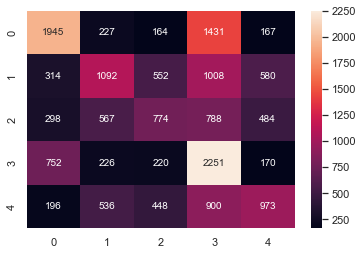

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
sb.heatmap(confusion_matrix, annot=True, fmt='g')

In [ ]:
from sklearn.metrics import roc_auc_score
logit_roc_auc_ovo = roc_auc_score(y_test, logreg.predict_proba(x_test_tfidf), multi_class="ovo")
macro_logit_roc_auc_ovr = roc_auc_score(y_test, logreg.predict_proba(x_test_tfidf), average="macro", multi_class="ovr")

print("ROC-AUC (OVO)", logit_roc_auc_ovo)
print("ROC-AUC (OVR)", macro_logit_roc_auc_ovr)

ROC-AUC (OVO) 0.7365151508124343
ROC-AUC (OVR) 0.740161670229497


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score

micro_prec, micro_rec, _, _ = precision_recall_fscore_support(y_test, y_pred, average="micro")
micro_f1_score = f1_score(y_test, y_pred, average="micro")
macro_prec, macro_rec, _, _ = precision_recall_fscore_support(y_test, y_pred, average="macro")
macro_f1_score = f1_score(y_test, y_pred, average="macro")

In [ ]:
print("Accuracy:", logreg.score(x_test_tfidf, y_test))
print("ROC-AUC (OVR) score:", macro_logit_roc_auc_ovr)
print("Precision (Micro)", micro_prec)
print("Recall (Micro)", micro_rec)
print("F1-score (Micro)", micro_f1_score)
print("Precision (Macro)", macro_prec)
print("Recall (Macro)", macro_rec)
print("F1-score (Macro)", macro_f1_score)

Accuracy: 0.41229561038504364
ROC-AUC (OVR) score: 0.740161670229497
Precision (Micro) 0.41229561038504364
Recall (Micro) 0.41229561038504364
F1-score (Micro) 0.41229561038504364
Precision (Macro) 0.417752482790553
Recall (Macro) 0.401789260517158
F1-score (Macro) 0.3979634596094387


In [ ]:
import pickle
filename = "logreg_tfidf_subset.sav"
pickle.dump(logreg, open(filename, "wb"))

### TF-IDF with PCA

In [ ]:
from sklearn.decomposition import TruncatedSVD
transformer = TruncatedSVD(300)
X_train_v2 = transformer.fit_transform(x_train_tfidf)
X_test_v2 = transformer.transform(x_test_tfidf)

In [ ]:
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
logreg.fit(X_train_v2, y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [ ]:
y_pred = logreg.predict(X_test_v2)
print('Accuracy of logistic regression classifier on test set: {}'.format(logreg.score(X_test_v2, y_test)))

Accuracy of logistic regression classifier on test set: 0.37642852956689915


<AxesSubplot: >

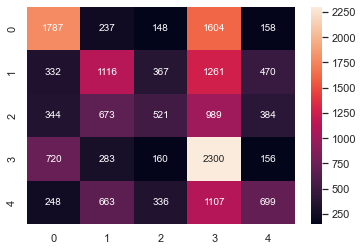

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
sb.heatmap(confusion_matrix, annot=True, fmt='g')

In [ ]:
from sklearn.metrics import roc_auc_score
logit_roc_auc_ovo = roc_auc_score(y_test, logreg.predict_proba(X_test_v2), multi_class="ovo")
macro_logit_roc_auc_ovr = roc_auc_score(y_test, logreg.predict_proba(X_test_v2), average="macro", multi_class="ovr")

print("ROC-AUC (OVO)", logit_roc_auc_ovo)
print("ROC-AUC (OVR)", macro_logit_roc_auc_ovr)

ROC-AUC (OVO) 0.7082344356719767
ROC-AUC (OVR) 0.7121776579967234


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score

micro_prec, micro_rec, _, _ = precision_recall_fscore_support(y_test, y_pred, average="micro")
micro_f1_score = f1_score(y_test, y_pred, average="micro")
macro_prec, macro_rec, _, _ = precision_recall_fscore_support(y_test, y_pred, average="macro")
macro_f1_score = f1_score(y_test, y_pred, average="macro")

In [ ]:
print("Accuracy:", logreg.score(X_test_v2, y_test))
print("ROC-AUC (OVR) score:", macro_logit_roc_auc_ovr)
print("Precision (Micro)", micro_prec)
print("Recall (Micro)", micro_rec)
print("F1-score (Micro)", micro_f1_score)
print("Precision (Macro)", macro_prec)
print("Recall (Macro)", macro_rec)
print("F1-score (Macro)", macro_f1_score)

Accuracy: 0.37642852956689915
ROC-AUC (OVR) score: 0.7121776579967234
Precision (Micro) 0.37642852956689915
Recall (Micro) 0.37642852956689915
F1-score (Micro) 0.37642852956689915
Precision (Macro) 0.3855161301636995
Recall (Macro) 0.36248639127886345
F1-score (Macro) 0.3538342341024352


In [ ]:
import pickle
filename = "logreg_tfidf_pca_subset.sav"
pickle.dump(logreg, open(filename, "wb"))

### Glove embedding 

In [ ]:
glove2vector = {}

with open(f'glove.twitter.27B.100d.txt', 'rb') as f:
  for l in f:
    line = l.decode().split()
    word = line[0]
    vect = np.array(line[1:]).astype(np.float)
    glove2vector[word] = vect 

len(glove2vector)

/var/folders/xz/z0kw7g5n10s5qncvzws5gxhr0000gn/T/ipykernel_77473/3480714329.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  vect = np.array(line[1:]).astype(np.float)


1193515

In [ ]:
combined = combined.reset_index()

In [ ]:
from ast import literal_eval
import re

def clean_text(sen):
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sen)
    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)
    return sentence

def join_text(x):
  return clean_text(x)
combined["text_clean"] = combined["text"].apply(lambda x: join_text(x))
test_df["text_clean"] = test_df["text"].apply(lambda x: join_text(x))

In [ ]:
X_train, y_train = combined["text_clean"], combined["label"]
X_test, y_test = test_df["text_clean"], test_df["label"]

In [ ]:
def transform(X):
  return np.array([
            np.mean([glove2vector[w] for w in words if w in glove2vector]
                   or [np.zeros(100)], axis=0) for words in X])

train_padded = transform(X_train)
test_padded = transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
logreg.fit(train_padded, y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [ ]:
y_pred = logreg.predict(test_padded)
print('Accuracy of logistic regression classifier on test set: {}'.format(logreg.score(test_padded, y_test)))

Accuracy of logistic regression classifier on test set: 0.27099572173709197


<AxesSubplot: >

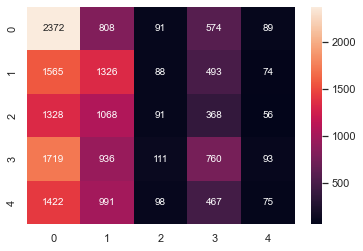

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
sb.heatmap(confusion_matrix, annot=True, fmt='g')

In [ ]:
from sklearn.metrics import roc_auc_score
logit_roc_auc_ovo = roc_auc_score(y_test, logreg.predict_proba(test_padded), multi_class="ovo")
macro_logit_roc_auc_ovr = roc_auc_score(y_test, logreg.predict_proba(test_padded), average="macro", multi_class="ovr")

print("ROC-AUC (OVO)", logit_roc_auc_ovo)
print("ROC-AUC (OVR)", macro_logit_roc_auc_ovr)

ROC-AUC (OVO) 0.5733192907980532
ROC-AUC (OVR) 0.5752006035818107


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score

micro_prec, micro_rec, _, _ = precision_recall_fscore_support(y_test, y_pred, average="micro")
micro_f1_score = f1_score(y_test, y_pred, average="micro")
macro_prec, macro_rec, _, _ = precision_recall_fscore_support(y_test, y_pred, average="macro")
macro_f1_score = f1_score(y_test, y_pred, average="macro")

In [ ]:
print("Accuracy:", logreg.score(test_padded, y_test))
print("ROC-AUC (OVR) score:", macro_logit_roc_auc_ovr)
print("Precision (Micro)", micro_prec)
print("Recall (Micro)", micro_rec)
print("F1-score (Micro)", micro_f1_score)
print("Precision (Macro)", macro_prec)
print("Recall (Macro)", macro_rec)
print("F1-score (Macro)", macro_f1_score)

Accuracy: 0.27099572173709197
ROC-AUC (OVR) score: 0.5752006035818107
Precision (Micro) 0.27099572173709197
Recall (Micro) 0.27099572173709197
F1-score (Micro) 0.27099572173709197
Precision (Macro) 0.24199730413184434
Recall (Macro) 0.24854412443035928
F1-score (Macro) 0.20588770860745131


In [ ]:
import pickle
filename = "logreg_glove_subset.sav"
pickle.dump(logreg, open(filename, "wb"))

### Hyperparameter tuning for TD-IDF

Rationale: TF-IDF is best performing embedding so we focus on this first.<br>
Reference: https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [ ]:
# multiclass solvers are: newton-cg, sag, saga, lbfgs
# only saga supports L1 in addition to L2

model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'sag', 'saga']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train_tfidf, y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The ma

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The ma

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.415641 using {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.396380 (0.004704) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.408360 (0.004664) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.396397 (0.004711) with: {'C': 100, 'penalty': 'l2', 'solver': 'sag'}
0.396697 (0.004691) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.408153 (0.004825) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.408583 (0.005915) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.408155 (0.004824) with: {'C': 10, 'penalty': 'l2', 'solver': 'sag'}
0.408139 (0.004826) with: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
0.415641 (0.004492) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.414358 (0.005236) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.415641 (0.004492) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'sag'}
0.415634 (0.004493) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
0.412623 (0.004073) with: {'C': 0.1, 'penalty': 'l2',

In [ ]:
## Newton-cg with l2 solver and C = 1 gives the best results for logreg based on cross validation

logreg = LogisticRegression(multi_class='multinomial', solver='newton-cg', C=1.0, penalty='l2')
logreg.fit(x_train_tfidf, y_train)

LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [ ]:
y_pred = logreg.predict(x_test_tfidf)
print('Accuracy of logistic regression classifier on test set: {}'.format(logreg.score(x_test_tfidf, y_test)))

Accuracy of logistic regression classifier on test set: 0.4144054386684639


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.50      0.53      3934
           1       0.41      0.32      0.36      3546
           2       0.36      0.26      0.30      2911
           3       0.36      0.61      0.45      3619
           4       0.41      0.32      0.36      3053

    accuracy                           0.41     17063
   macro avg       0.42      0.40      0.40     17063
weighted avg       0.42      0.41      0.41     17063



<AxesSubplot: >

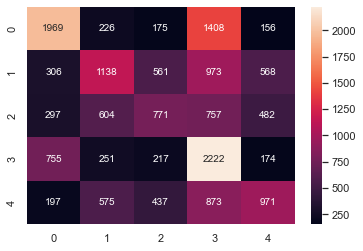

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
sb.heatmap(confusion_matrix, annot=True, fmt='g')

In [ ]:
from sklearn.metrics import roc_auc_score
logit_roc_auc_ovo = roc_auc_score(y_test, logreg.predict_proba(x_test_tfidf), multi_class="ovo")
macro_logit_roc_auc_ovr = roc_auc_score(y_test, logreg.predict_proba(x_test_tfidf), average="macro", multi_class="ovr")

print("ROC-AUC (OVO)", logit_roc_auc_ovo)
print("ROC-AUC (OVR)", macro_logit_roc_auc_ovr)

ROC-AUC (OVO) 0.7392508387459575
ROC-AUC (OVR) 0.7428288228651636


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score

micro_prec, micro_rec, _, _ = precision_recall_fscore_support(y_test, y_pred, average="micro")
micro_f1_score = f1_score(y_test, y_pred, average="micro")
macro_prec, macro_rec, _, _ = precision_recall_fscore_support(y_test, y_pred, average="macro")
macro_f1_score = f1_score(y_test, y_pred, average="macro")

In [ ]:
print("Accuracy:", logreg.score(x_test_tfidf, y_test))
print("ROC-AUC (OVR) score:", macro_logit_roc_auc_ovr)
print("Precision (Micro)", micro_prec)
print("Recall (Micro)", micro_rec)
print("F1-score (Micro)", micro_f1_score)
print("Precision (Macro)", macro_prec)
print("Recall (Macro)", macro_rec)
print("F1-score (Macro)", macro_f1_score)

Accuracy: 0.4144054386684639
ROC-AUC (OVR) score: 0.7428288228651636
Precision (Micro) 0.4144054386684639
Recall (Micro) 0.4144054386684639
F1-score (Micro) 0.41440543866846385
Precision (Macro) 0.41846521737111597
Recall (Macro) 0.40366407926953174
F1-score (Macro) 0.4002951150559756


In [ ]:
import pickle
filename = "logreg_tfidf_subset_tuned.sav"
pickle.dump(logreg, open(filename, "wb"))